In [1]:
(* Utilities *)
GenerateTeX[expr_, texrules_] := Block[
    {n, symbols, texts, rules1, rules2},
    n=Length[texrules];
    symbols = Table[Symbol["$generatetex"<>ToString[i]], {i,1,n}];
    texts = Table["\\text{$\\$$generatetex"<>ToString[i]<>"}", {i,1,n}];
    rules1 = Table[Rule[texrules[[i]][[1]], symbols[[i]]], {i,n}];
    rules2 = Table[Rule[texts[[i]], "{"<>texrules[[i]][[2]]<>"}"], {i,n}];
    StringReplace[ToString[TeXForm[expr /. rules1]], rules2]
]

In [3]:
(* Reference state *)

(* Riemanninan metric *)
g₍₀₎₁₁[u¹_,u²_] = 1 - 2 𝜅₍₀₎[u¹] u² + (𝜅₍₀₎[u¹]^2 - 𝐾₍₀₎[u¹]) u²^2 + O[u²]^3;
g₍₀₎₁₂[u¹_,u²_] = 0;
g₍₀₎₂₁[u¹_,u²_] = 0;
g₍₀₎₂₂[u¹_,u²_] = 1;
g₍₀₎[u¹_,u²_] = {{g₍₀₎₁₁[u¹,u²],g₍₀₎₁₂[u¹,u²]},{g₍₀₎₂₁[u¹,u²],g₍₀₎₂₂[u¹,u²]}};
g₍₀₎⁽⁰⁾₁₁ = 1;
g₍₀₎⁽⁰⁾₁₂ = 0;
g₍₀₎⁽⁰⁾₂₁ = 0;
g₍₀₎⁽⁰⁾₂₂ = 1;
g₍₀₎⁽⁰⁾ = {{g₍₀₎⁽⁰⁾₁₁,g₍₀₎⁽⁰⁾₁₂},{g₍₀₎⁽⁰⁾₂₁,g₍₀₎⁽⁰⁾₂₂}};
(* Volume form *)
𝝊₍₀₎[u¹_,u²_] = Sqrt[Det[g₍₀₎[u¹,u²]]];

In [17]:
(* Current state *)
𝒑₍ₜ₎ᵦ[u¹_,u²_,β_] = 𝒄₍ₜ₎ᵦ[u¹,β] + 𝜉ᵦ[u¹,u²,β]𝒆₁₍ₜ₎ᵦ[u¹,β] + 𝜂ᵦ[u¹,u²,β]𝒆₂₍ₜ₎ᵦ[u¹,β];

Derivative[1,0][𝒄₍ₜ₎ᵦ][u¹_, β_] = s₍ₜ₎ᵦ[u¹, β]𝒆₁₍ₜ₎ᵦ[u¹, β];
Derivative[1,0][𝒆₁₍ₜ₎ᵦ][u¹_, β_] = 𝜅₍ₜ₎ᵦ[u¹, β]𝒆₂₍ₜ₎ᵦ[u¹, β];
Derivative[1,0][𝒆₂₍ₜ₎ᵦ][u¹_, β_] = -𝜅₍ₜ₎ᵦ[u¹, β]𝒆₁₍ₜ₎ᵦ[u¹, β];
𝜉ᵦ[u¹_, 0, β_] = 0;
𝜂ᵦ[u¹_, 0, β_] = 0;
Derivative[i_,0,k_][𝜉ᵦ][u¹_, 0, β_] = 0;
Derivative[i_,0,k_][𝜂ᵦ][u¹_, 0, β_] = 0;

(* Tangent vector *)
𝒑₍ₜ₎ᵦ₁[u¹_,u²_,β_] = D[𝒑₍ₜ₎ᵦ[u¹,u²,β],u¹];
𝒑₍ₜ₎ᵦ₂[u¹_,u²_,β_] = D[𝒑₍ₜ₎ᵦ[u¹,u²,β],u²];
tmp₁[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₁[u¹, u², β]/.{𝒆₁₍ₜ₎ᵦ[u¹, β] -> {1,0}, 𝒆₂₍ₜ₎ᵦ[u¹, β] -> {0,1}};
tmp₂[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₂[u¹, u², β]/.{𝒆₁₍ₜ₎ᵦ[u¹, β] -> {1,0}, 𝒆₂₍ₜ₎ᵦ[u¹, β] -> {0,1}};
(* Riemannian metric *)
g₍ₜ₎ᵦ₁₁[u¹_,u²_,β_] = tmp₁[u¹,u²,β].tmp₁[u¹,u²,β] // Simplify;
g₍ₜ₎ᵦ₁₂[u¹_,u²_,β_] = tmp₁[u¹,u²,β].tmp₂[u¹,u²,β] // Simplify;
g₍ₜ₎ᵦ₂₁[u¹_,u²_,β_] = tmp₂[u¹,u²,β].tmp₁[u¹,u²,β] // Simplify;
g₍ₜ₎ᵦ₂₂[u¹_,u²_,β_] = tmp₂[u¹,u²,β].tmp₂[u¹,u²,β] // Simplify;
g₍ₜ₎ᵦ[u¹_,u²_,β_] = {{g₍ₜ₎ᵦ₁₁[u¹,u²,β],g₍ₜ₎ᵦ₁₂[u¹,u²,β]},{g₍ₜ₎ᵦ₂₁[u¹,u²,β],g₍ₜ₎ᵦ₂₂[u¹,u²,β]}};
g₍ₜ₎ᵦ⁽⁰⁾₁₁[u¹_,u²_,β_] = g₍ₜ₎ᵦ₁₁[u¹,u²,β] / g₍₀₎₁₁[u¹,u²];
g₍ₜ₎ᵦ⁽⁰⁾₁₂[u¹_,u²_,β_] = g₍ₜ₎ᵦ₁₂[u¹,u²,β] / Sqrt[g₍₀₎₁₁[u¹,u²]];
g₍ₜ₎ᵦ⁽⁰⁾₂₁[u¹_,u²_,β_] = g₍ₜ₎ᵦ₂₁[u¹,u²,β] / Sqrt[g₍₀₎₁₁[u¹,u²]];
g₍ₜ₎ᵦ⁽⁰⁾₂₂[u¹_,u²_,β_] = g₍ₜ₎ᵦ₂₂[u¹,u²,β];
g₍ₜ₎ᵦ⁽⁰⁾[u¹_,u²_,β_] = {{g₍ₜ₎ᵦ⁽⁰⁾₁₁[u¹,u²,β],g₍ₜ₎ᵦ⁽⁰⁾₁₂[u¹,u²,β]},{g₍ₜ₎ᵦ⁽⁰⁾₂₁[u¹,u²,β],g₍ₜ₎ᵦ⁽⁰⁾₂₂[u¹,u²,β]}};

In [69]:
(* Strain tensor *)
E⁽⁰⁾ᵦ[u¹_, u²_, β_] = (g₍ₜ₎ᵦ⁽⁰⁾[u¹, u², β] - g₍₀₎⁽⁰⁾)/2;

d = 2;
𝜆 = 𝜈*Y/((1+𝜈)(1-(d-1)𝜈));
𝜇 = Y/(2(1+𝜈));
𝛿 = KroneckerDelta;
C⁽⁰⁾ = Table[𝜆 𝛿[i,j] 𝛿[k,l] + 𝜇(𝛿[i,k] 𝛿[j,l] + 𝛿[i,l] 𝛿[j,k]),{i,1,d},{j,1,d},{k,1,d},{l,1,d}];

𝒲ᵦ[E⁽⁰⁾ᵦ_,u¹_,u²_,β_] := Simplify[Sum[C⁽⁰⁾[[i,j,k,l]]*E⁽⁰⁾ᵦ[u¹,u²,β][[i,j]]*E⁽⁰⁾ᵦ[u¹,u²,β][[k,l]],{i,1,d},{j,1,d},{k,1,d},{l,1,d}]*𝝊₍₀₎[u¹,u²]/2, Assumptions -> Cos[u²/R]>0];
𝒲ᵦ[u¹_,u²_,β_] = 𝒲ᵦ[E⁽⁰⁾ᵦ,u¹,u²,β];

2                           2
s₍ₜ₎ᵦ[u¹, β]  + (2 𝜅₍₀₎[u¹] s₍ₜ₎ᵦ[u¹, β]  + 
 
                                        (0,1,0)                (1,1,0)
>      2 s₍ₜ₎ᵦ[u¹, β] (-(𝜅₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, 0, β]) + 𝜉ᵦ       [u¹, 0, β])) u² + 
 
                           2              2
>   ((𝐾₍₀₎[u¹] + 3 𝜅₍₀₎[u¹] ) s₍ₜ₎ᵦ[u¹, β]  + 
 
                       (0,1,0)               (1,1,0)           2
>      (𝜅₍ₜ₎ᵦ[u¹, β] 𝜉ᵦ       [u¹, 0, β] + 𝜂ᵦ       [u¹, 0, β])  + 
 
                                                 (0,1,0)
>      4 𝜅₍₀₎[u¹] s₍ₜ₎ᵦ[u¹, β] (-(𝜅₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, 0, β]) + 
 
            (1,1,0)                                (0,1,0)
>         𝜉ᵦ       [u¹, 0, β]) + (-(𝜅₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, 0, β]) + 
 
            (1,1,0)           2
>         𝜉ᵦ       [u¹, 0, β])  + s₍ₜ₎ᵦ[u¹, β] 
 
                          (0,2,0)                (1,2,0)               2        3
>       (-(𝜅₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, 0, β]) + 𝜉ᵦ       [u¹, 0, β])) u²  + O[u²]
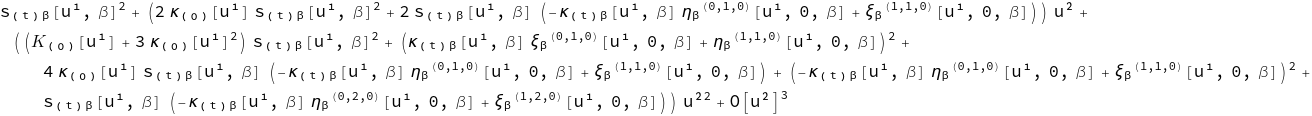

In [107]:
g₍ₜ₎ᵦ⁽⁰⁾₁₁[u¹,u²,β]

In [110]:
(* Green's strain tensor *)
E⁽⁰⁾₁₁ᵦ = (g₍ₜ₎⁽⁰⁾₁₁ᵦ - g₍₀₎⁽⁰⁾₁₁ᵦ)/2;
E⁽⁰⁾₁₂ᵦ = (g₍ₜ₎⁽⁰⁾₁₂ᵦ - g₍₀₎⁽⁰⁾₁₂ᵦ)/2;
E⁽⁰⁾₂₁ᵦ = (g₍ₜ₎⁽⁰⁾₂₁ᵦ - g₍₀₎⁽⁰⁾₂₁ᵦ)/2;
E⁽⁰⁾₂₂ᵦ = (g₍ₜ₎⁽⁰⁾₂₂ᵦ - g₍₀₎⁽⁰⁾₂₂ᵦ)/2;
E⁽⁰⁾ᵦ = {{E⁽⁰⁾₁₁ᵦ,E⁽⁰⁾₁₂ᵦ},{E⁽⁰⁾₂₁ᵦ,E⁽⁰⁾₂₂ᵦ}} // Simplify;

-g₍₀₎⁽⁰⁾₁₁ᵦ + g₍ₜ₎⁽⁰⁾₁₁ᵦ  -g₍₀₎⁽⁰⁾₁₂ᵦ + g₍ₜ₎⁽⁰⁾₁₂ᵦ
{{------------------------, ------------------------}, 
             2                         2
 
     -g₍₀₎⁽⁰⁾₂₁ᵦ + g₍ₜ₎⁽⁰⁾₂₁ᵦ  -g₍₀₎⁽⁰⁾₂₂ᵦ + g₍ₜ₎⁽⁰⁾₂₂ᵦ
>   {------------------------, ------------------------}}
                2                         2
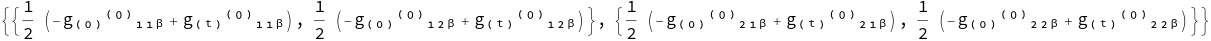

In [116]:
E⁽⁰⁾ᵦ

-(𝜂ᵦ[u¹, u², β] 𝜅₍ₜ₎ᵦ[u¹, β] 𝒆₁₍ₜ₎ᵦ[u¹, β]) + 𝜉ᵦ[u¹, u², β] 𝜅₍ₜ₎ᵦ[u¹, β] 𝒆₂₍ₜ₎ᵦ[u¹, β] + 
 
                                                 (1,0,0)
>   𝒆₁₍ₜ₎ᵦ[u¹, β] s₍ₜ₎ᵦ[u¹, β] + 𝒆₂₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, u², β] + 
 
                    (1,0,0)
>   𝒆₁₍ₜ₎ᵦ[u¹, β] 𝜉ᵦ       [u¹, u², β]
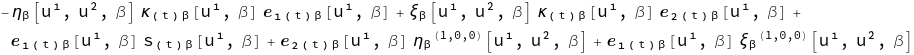

In [41]:
𝒑₍ₜ₎ᵦ₁[u¹,u²,β]

(-(𝜂ᵦ[u¹, u², β] 𝜅₍ₜ₎ᵦ[u¹, β] 𝒆₁₍ₜ₎ᵦ[u¹, β]) + 
 
>     𝜉ᵦ[u¹, u², β] 𝜅₍ₜ₎ᵦ[u¹, β] 𝒆₂₍ₜ₎ᵦ[u¹, β] + 𝒆₁₍ₜ₎ᵦ[u¹, β] s₍ₜ₎ᵦ[u¹, β] + 
 
                      (1,0,0)                              (1,0,0)
>     𝒆₂₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, u², β] + 𝒆₁₍ₜ₎ᵦ[u¹, β] 𝜉ᵦ       [u¹, u², β]) . 
 
>   (-(𝜂ᵦ[u¹, u², β] 𝜅₍ₜ₎ᵦ[u¹, β] 𝒆₁₍ₜ₎ᵦ[u¹, β]) + 
 
>     𝜉ᵦ[u¹, u², β] 𝜅₍ₜ₎ᵦ[u¹, β] 𝒆₂₍ₜ₎ᵦ[u¹, β] + 𝒆₁₍ₜ₎ᵦ[u¹, β] s₍ₜ₎ᵦ[u¹, β] + 
 
                      (1,0,0)                              (1,0,0)
>     𝒆₂₍ₜ₎ᵦ[u¹, β] 𝜂ᵦ       [u¹, u², β] + 𝒆₁₍ₜ₎ᵦ[u¹, β] 𝜉ᵦ       [u¹, u², β])
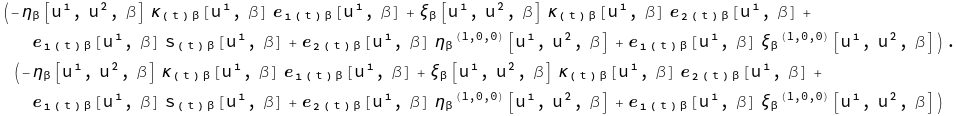

In [42]:
g₍ₜ₎ᵦ₁₁[u¹,u²,β]

In [49]:
tmp1[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₁[u¹, u², β]/.{𝒆₁₍ₜ₎ᵦ[u¹, β] -> {1,0}, 𝒆₂₍ₜ₎ᵦ[u¹, β] -> {0,1}};
tmp2[u¹_, u²_, β_] = 𝒑₍ₜ₎ᵦ₂[u¹, u², β]/.{𝒆₁₍ₜ₎ᵦ[u¹, β] -> {1,0}, 𝒆₂₍ₜ₎ᵦ[u¹, β] -> {0,1}};